# Podział zbioru treningowego i miary jakości

#### Danijel Koržinek <danijel@pja.edu.pl>


Uruchom poniższy blok:

Maciej Ostrowski s25754 

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Zacznijmy od wczytania zbioru danych z biblioteki `sklearn.datasets`. Zapisz wynik funkcji `load_breast_cancer` do zmiennej:

In [3]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()

df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Wypisz wszystkie składowe `keys()` otrzymanego zbioru:

In [4]:
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


Zobaczmy składową `DESCR`:

In [5]:
print(df['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Jest to zbiór przeznaczony do binarnej klasyfikacji rzeczywistych danych liczbowych. Wypisz nazwy cech (`feature_names`) i klas (`target_names`):

In [6]:
print(df['feature_names'])
print(df['target_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


Wypisz rozmiary tablic danych (`data`) i klas (`target`):

In [7]:
print(df['data'].shape)
print(df['target'].shape)

(569, 30)
(569,)


## Podział danych

Użyj metody `train_test_split` z modułu `sklearn.model_selection` żeby podzielić zbiór na część treningową (90%) i testową (10%). Użyj straktyfikacji w podziale danych:

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.1, random_state=42, stratify=df['target'])

Wczytaj następujące klasyfikatory:

```
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
```

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier



Dla każdego klasyfikatora (skonstruowanego domyślnymi parametrami) zastosuj odpowiednio metody `fit` na danych treningowych i `score` na danych testowych żeby otrzymać jego dokładność. Zaleca się zrobić słownik poszczególnych modeli i uruchomić wszystko w pętli `for`. Co się stanie jak zmienimy podział danych (użyjemy metody split ponownie)?

In [10]:
methods = {'LinearRegression': LinearRegression(), 'GaussianProcessClassifier': GaussianProcessClassifier(), 'GaussianNB': GaussianNB(), 'MLPClassifier': MLPClassifier(), 'SVC': SVC(), 'KNeighborsClassifier': KNeighborsClassifier(), 'SGDClassifier': SGDClassifier()}

for(name, method) in methods.items():
    method.fit(x_train, y_train)
    print("{}: {}".format(name, method.score(x_test, y_test)))


LinearRegression: 0.6970003216389791
GaussianProcessClassifier: 0.9298245614035088
GaussianNB: 0.9824561403508771
MLPClassifier: 0.8771929824561403
SVC: 0.9298245614035088
KNeighborsClassifier: 0.9122807017543859
SGDClassifier: 0.9298245614035088


## Walidacja krzyżowa

Przy niewielkim zbiorze danych, ciężko jest wydzielić reprezentatywny zbiór testowy. Jeden ze sposobów jest uruchomić cały proces kilka razy i raportować średnie i odchylenia uzyskanych wyników.

Lepszym sposobem jest podzielić cały zbiór danych na `K` paczek i iteracyjnie użyć każdej paczki jako dane testowe, a wszystkie inne (w każdej iteracji) jako dane treningowe.

Użyj klasy `StratifiedKFold` z modułu `sklearn.model_selection` żeby podzielić zbiór na 5 części i powtórz poprzedni eksperyment do liczenia dokładności modeli. Jako wynik podaj wartość średnią i odchylenie standardowe dla wsyzstkich podziałów danego modelu.

In [11]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

X = df['data']
y = df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for (name, method) in methods.items():
    acc = []
    for train_index, test_index in skf.split(X, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        method.fit(x_train, y_train)
        acc.append(method.score(x_test, y_test))
    
    print("{} mean: {}".format(name, mean(acc)))
    print("{} mean: {}".format(name, stdev(acc)))

LinearRegression mean: 0.7418421487834517
LinearRegression mean: 0.04950362405910156
GaussianProcessClassifier mean: 0.9156342182890855
GaussianProcessClassifier mean: 0.007939761513869386
GaussianNB mean: 0.9385343890700202
GaussianNB mean: 0.026238414409424152
MLPClassifier mean: 0.9069709672411116
MLPClassifier mean: 0.04038828930262406
SVC mean: 0.9138953578636858
SVC mean: 0.027276908252279637
KNeighborsClassifier mean: 0.9350100916006832
KNeighborsClassifier mean: 0.021925077079469283
SGDClassifier mean: 0.8576773792889303
SGDClassifier mean: 0.046056212683787276


Naturalnym pytaniem jest jaką wartość wybrać dla parametru `K`. Im więcej paczek użyjemy, tym większa wariancja w wynikach. Dużo paczek oznacza mniejsze ryzyko biasu w eksperymentach, ale testy są robione na mniejszej ilości danych i przez to są bardziej chaotyczne. Mniej paczek oznacza bardziej dokładne wyniki testów, ale jest ryzyko że dane w ustalonych podziałach będa mniej reprezentatywne dla ogółu problemu. W skrajnym przypadku możemy użyć tyle paczek ile jest próbek - ta metoda nazywa się Leave-One-Out.

Powtórz te same eksperymenty co poprzednio używając klasy `LeaveOneOut`, ale dla osczędności czasu użyj tylko jednego klasyfikatora (np SVC):

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
svc = SVC()

accuracies = []

for train_index, test_index in loo.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    method.fit(x_train, y_train)
    accuracies.append(method.score(x_test, y_test))

print('SVC mean: {}'.format(mean(accuracies)))
print('SVC stdev: {}'.format(stdev(accuracies)))

SVC mean: 0.8840070298769771
SVC stdev: 0.32049824759436235


## Miary jakości modelu

Wczytaj następujące metody:
```
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
```

Zrób zwykły podział train/test 90/10. Dla wszystkich modeli oprócz regresji liniowej, zastosuj odpowiednio metody `fit` na danych treningowych i `predict` na danych testowych. Potem policz odpowiednio dokładność (`accuracy_score`), precyzję (`precision`), czułóść (`recall`), f-score i macierz konfuzji dla poszczególnych klasyfikatorów. Użyj też metody `classification_report` żeby zobaczyć ogólny raport:

In [13]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, recall_score, precision_score, f1_score, auc

x_train, x_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.1, random_state=42, stratify=df['target'])

methods = {'GaussianProcessClassifier': GaussianProcessClassifier(), 'GaussianNB': GaussianNB(), 'MLPClassifier': MLPClassifier(), 'SVC': SVC(), 'KNeighborsClassifier': KNeighborsClassifier(), 'SGDClassifier': SGDClassifier()}


for(name, method) in methods.items():
    method.fit(x_train, y_train)
    predict = method.predict(x_test)
    metrics = {'accuracy': accuracy_score(y_test, predict), 'precission': precision_score(y_test, predict), 'recall': recall_score(y_test, predict), 'f1': f1_score(y_test, predict), 'confusion': confusion_matrix(y_test, predict), 'report': classification_report(y_test, predict) }
    for metric_name, metric in metrics.items():
        print('{} {}: {}'.format(name, metric_name, metric))
    

GaussianProcessClassifier accuracy: 0.9298245614035088
GaussianProcessClassifier precission: 0.9444444444444444
GaussianProcessClassifier recall: 0.9444444444444444
GaussianProcessClassifier f1: 0.9444444444444444
GaussianProcessClassifier confusion: [[19  2]
 [ 2 34]]
GaussianProcessClassifier report:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57

GaussianNB accuracy: 0.9824561403508771
GaussianNB precission: 0.972972972972973
GaussianNB recall: 1.0
GaussianNB f1: 0.9863013698630138
GaussianNB confusion: [[20  1]
 [ 0 36]]
GaussianNB report:               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    acc

c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## ROC i AUC

Użyj wszystkich modeli oprócz regresji liniowej i GPC, a dla SVC dodaj parametr `probability=True`. Użyj walidacji krzyżowej żeby wytrenować każdy z modeli i policzyć `predict_proba` dla całego zbioru. Potem policz `roc_curve` i `auc_score` dla wszystkich modeli i narysuj na wykresie. 

Najpierw użyj tych poleceń żeby otrzymać pusty wykres ROC:

```
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
```

Dla każdego klasyfikatora użyj metody `plot` żeby narysować wartości `x=fpr` i `y=tpr` z metody `roc_curve`, a jako `label` ustaw nazwę modelu i jego `AUC`. Na końcu uruchom metodę `legend(loc='lower right')` żeby narysować legendę w dolnym prawym rogu wykresu.

GaussianNB mean: 0.9385343890700202
MLPClassifier mean: 0.9262381617761217
SVC mean: 0.9138953578636858
KNeighborsClassifier mean: 0.9350100916006832
SGDClassifier mean: 0.9244837758112094


c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


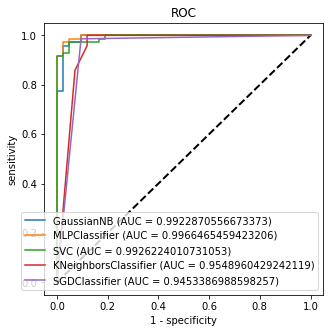

In [14]:
import matplotlib.pyplot as plt

methods = {'GaussianNB': GaussianNB(), 'MLPClassifier': MLPClassifier(), 'SVC': SVC(probability=True), 'KNeighborsClassifier': KNeighborsClassifier(), 'SGDClassifier': SGDClassifier(loss='log')}

X = df['data']
y = df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], color='black', linewidth=2, linestyle='--')
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('ROC')

for (name, method) in methods.items():
    acc = []
    for train_index, test_index in skf.split(X, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        method.fit(x_train, y_train)
        acc.append(method.score(x_test, y_test))
    
    predict = method.predict_proba(x_test)

    print("{} mean: {}".format(name, mean(acc)))
    fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
    auc_score = roc_auc_score(y_test, predict[:,1], average=None)
    plt.plot(fpr, tpr, label='{} (AUC = {})'.format(name, auc_score))




plt.legend(loc='lower right')

# Zadanie 1. -- Klasyfikacja wieloetykietowa

Powtórz powyższe zadania na zbiorze danych win uzyskanego metodą `load_wine` z modułu `sklearn.datasets`. Warto zwrócić uwagę, że ten zbiór definiuje 3 różne klasy.

Użyj `sklearn.multiclass.OneVsRestClassifier` żeby zastosować poprzednie klasyfikatory na nowych danych.

Przy liczeniu krzywy ROC i wartości AUC użyj `sklearn.preprocessing.label_binarize` na referncji i metody `ravel()` na macierzach wyjściowych przed narysowaniem.

In [15]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np

df_wine = load_wine()
print(df_wine.keys())
print(df_wine['feature_names'])
print(df_wine['target_names'])
print(df_wine['data'].shape)
print(df_wine['target'].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
(178, 13)
(178,)


GaussianNB mean: 0.9719047619047619


c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ostri\anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPClassifier mean: 0.5858730158730159
SVC mean: 0.6853968253968253
KNeighborsClassifier mean: 0.6857142857142857
SGDClassifier mean: 0.5457142857142857


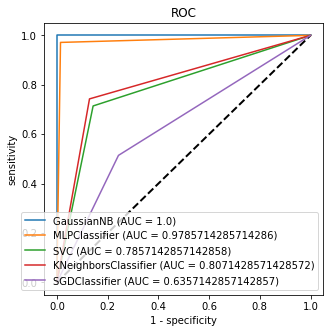

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_wine['data'], df_wine['target'], test_size=0.2, random_state=42, stratify=df_wine['target'])
methods = {'GaussianNB': GaussianNB(), 'MLPClassifier': MLPClassifier(), 'SVC': SVC(probability=True), 'KNeighborsClassifier': KNeighborsClassifier(), 'SGDClassifier': SGDClassifier(loss='log')}

x = df_wine['data']
y = df_wine['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], color='black', linewidth=2, linestyle='--')
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('ROC')

for (name, method) in methods.items():
    acc = []
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        onevsrest = OneVsRestClassifier(method)
        onevsrest.fit(x_train, y_train)
        acc.append(onevsrest.score(x_test, y_test))
    
    print("{} mean: {}".format(name, mean(acc)))
    predict = onevsrest.predict(x_test)

    y_test = label_binarize(y_test, classes=[0,1,2])
    predict = label_binarize(predict, classes=[0,1,2])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()


    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predict.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"], label='{} (AUC = {})'.format(name, roc_auc["micro"]))
    plt.legend(loc='lower right')



# Zadanie 2. -- Optymalizacja hiperparametru

Użyj podwójnej walidacji krzyżowej żeby znaleźć średnią skuteczność klasyfikatora SVC (na danych `load_breast_cancer`) dla optymalnego parametru `C`.

Należy użyć podwójnej metody K-Fold: najpierw dzielimy zbiór na train/test, a potem w każdej iteracji zbiór train dodatowko dzielimy na train/dev kolejną pętlą walidacji krzyżowej. Za pomocą podziału train/dev szukamy jaki parametr `C` daje najlepszy wynik (załóżmy że przetestujemy ~10 różnych wartości równomiernie rozłożonych od 0.2 do 2 ), a potem użyjemy tą optymalną wartość żeby dokonać eksperymentu na zbiorze test.

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


X = df['data']
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(df_wine['data'], df_wine['target'], test_size=0.2, random_state=42, stratify=df_wine['target'])

model = SVC()
c_val = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
kfold = StratifiedKFold(n_splits=5, random_state=42)
sec_kfold = StratifiedKFold(n_splits=5, random_state=42)
acc_table = []

for train_index, test_index in kfold.split(X, y):
    max_acc = 0
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for train_index1, test_index1 in sec_kfold.split(x_train, y_train):
        x_train1, x_test1 = x_train[train_index1], x_train[test_index1]
        y_train1, y_test1 = y_train[train_index1], y_train[test_index1]
        for c in c_val:
            model.set_params(C=c)
            model.fit(x_train1, y_train1)
            if model.score(x_train1, y_train1) > max_acc:
                max_acc = model.score(x_train1, y_train1)
                best_c = c
    model.set_params(C=best_c)
    model.fit(x_test, y_test)
    acc_table.append(model.score(x_test, y_test))


print('Best acc for: {} that had accuracy: {}'.format(best_c, max_acc))      
print('Mean accuracy for best C: {}'.format(mean(acc_table)))
          




[0.8771929824561403, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9026548672566371]
Best acc for: 1.2 that had accuracy: 0.9315068493150684
Mean accuracy for best C: 0.9121099208197485
